# Internet of Water Indexing Overview

## A overview of the web architecture patterns

This notebook provides a basic overview of the indexing architecture used by Internet of Water.  


# Outline

* overview of the web architecture approach
* personas
* EoC circle diagram from my input
* "Fox" triangle
* patterns  (publishing material from OIH book)
* links to "Archetypes" concept
* high level use cases
    * connections with UFOKN
    * connections with OpenTopograph, Hydroshare
    * Google Data Commons
        * social economic data
        * spatial connections
    * wikidata and other KG completetion approaches for integration
    * Mention CODATA at all?   (DDI-CDI?)
* validation (to address the use cases), in truth validation is a fit for use test for use cases
* "sub graphs"  and other products
        * possible other products include geopackage and STAC.  Note that the
        * IoW graph is like a graph version of STAC.
* how the KG can help and what needs to happen from contributors and us
    * need to think about how to integrate validation into the publishing workflow better



# Overview



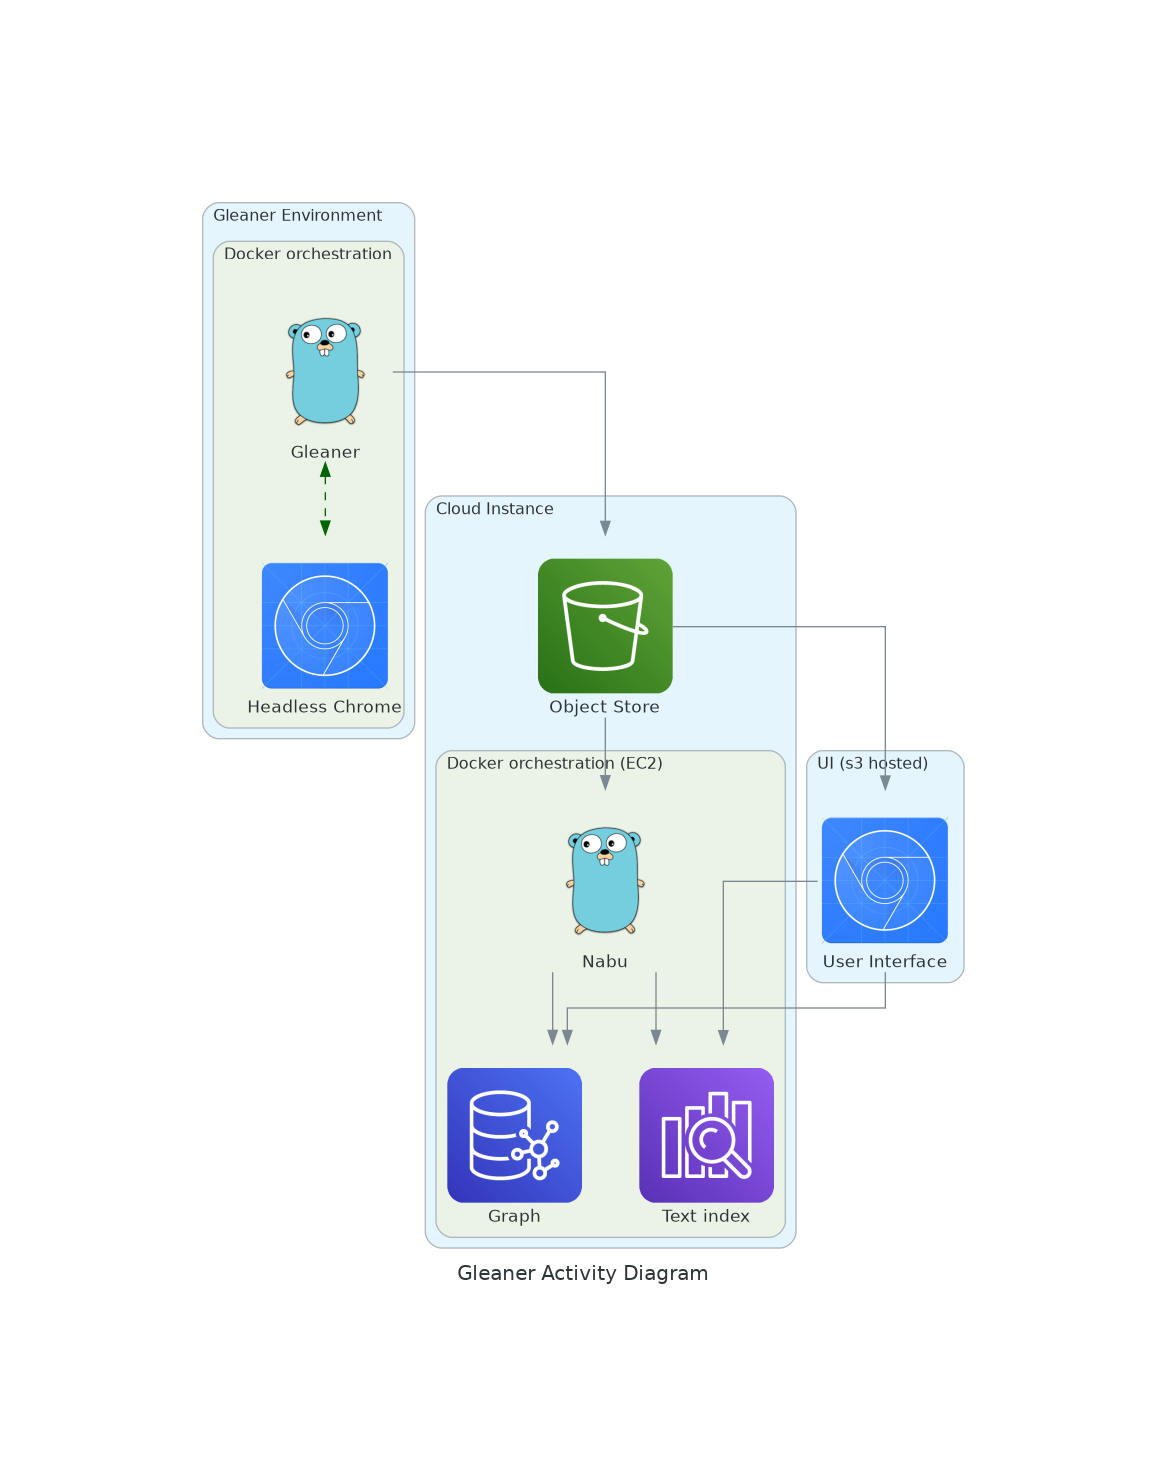

In [5]:
from diagrams import Cluster, Diagram, Node, Edge
from diagrams.programming.language import Go
from diagrams.aws.database import Neptune
from diagrams.aws.storage import S3
from diagrams.custom import Custom
from diagrams.aws.analytics import ElasticsearchService

with Diagram("Gleaner Activity Diagram", direction="TB", show=False) as med_diag:

    with Cluster("Cloud Instance"):
        oss = S3("Object Store")
        with Cluster("Docker orchestration (EC2)"):
            ts = Neptune("Graph")
            es = ElasticsearchService("Text index")
            nabu = Go("Nabu")

    with Cluster("Gleaner Environment"):
        with Cluster("Docker orchestration"):
            gleaner = Go("Gleaner")
            headless = Custom("Headless Chrome", "./content/chrome-devtools.png")

    with Cluster("UI (s3 hosted)"):
        ui = Custom("User Interface", "./content/chrome-devtools.png")

    # Indexing
    # rb >> sm >> resources >>  Edge(label="indexing") << gleaner
    gleaner >> oss
    gleaner >>  Edge(color="darkgreen",  style="dashed") <<  headless

    # Object store to Triplestore syncing (inclujding pruning)
    oss >> nabu >> ts
    nabu >> es

    # Object store hosed UI
    oss >> ui
    ui >> es
    ui >> ts

med_diag

# Persona

## Persona: Publisher

In OIH the Publisher is engaged authoring the JSON-LD documents and publishing them
to the web.  This persona is focused on describing and presenting structured data on the web
to aid in the discovery and use the resources they manage.
 Details on this persona can be found in the [Publisher](../publishing/publishing.md) section.
Additionally, this persona would be leveraging this encoding described in the [JSON-LD Foundation](../foundation/foundation.md) section and the
profiles described in the [Thematic Patterns](../thematics/README.md).

## Persona: Aggregator

In OIH the Aggregator is a person or organization who is indexing resources on the
web using the structured data on the web patterns described in this documentation.
Their goal is to efficiently and efficiently index the resources exposed by the Publisher
persona and generate usable indexes.  Further, they would work to exposed these indexes in
a manner that is usable by the User persona.
Details on the approach used by OIH and potential alternatives can be found in the
[Aggregator](../indexing/index.md) section.

## Persona: User

The user is the individual or community who wished to leverage the indexes generated
as a result of the publishing and aggregation activities. The user may be using the
developed knowledge graph or some web interface built on top of the knowledge graph or
other index.  They may also use query languages like SPARQL or other APIs or even
directly work with the underlying data warehouse of collected data graphs.

User tools may be web sites or scientific notebooks.  Some examples of these
user experiences are described in the [User](../users/referenceclient.md) section.

#  Personas and  GO FAIR Implementation Network

<div>
<img src="images/relations.png"  width="600"/>
<div>

* IMPLEMENT  clearly defined plans and deliverables to implement an element of the Internet of FAIR Data and Services (IFDS) within a defined time period;
* FOSTER  a community of harmonized FAIR practices;
* COMMUNICATE  together on critical issues on which consensus has been reached and which are of generic importance for the community.

<div>
<img src="images/foxtriangle.png"  width="400"/>
<div>

# Connections


## Use Case UFOKN


## Open Topography   Hydroshare

## Google Data Commons

## Others

WikiData andc CODATA  DDI-CDI




# Products

## subgraphs

## STAC like features

## RDF Conceptual Model Basis

A brief tour of RDF conceptual mode, the RDF ecosystem and SHACL (and JSON-LD) in that ecosystem.

<div>
<img src="images/ecosystem.png"  width="600"/>
<div>

Image credit: Pierre-Antoine Champin  https://www.w3.org/Talks/2021/09-19-ddi-cdi/?full#rdf-ecosystem

## Role of Validation

The various personas can be seen described in [https://book.oceaninfohub.org/personas/persona.html](https://book.oceaninfohub.org/personas/persona.html).  These give an idea of some of the players in an implementation.  The relations between these persona are potential areas where the shape of the graph may be important for query or other functions.     

Validation also helps to address application.  In particular the application of query to the graph.
**If we allow anything in "author" space, then we make the query in "user" space very complex** (to 
deal with the variety).  The result can be poor performance and bad recovery. 

# Validation Options

- JSON Schema
- ShEx
- SHACL
- Others (like Cue lang)

## Why SHACL?

SHACL is on a W3C recommendation track while ShEx is a community project.  SHACL has also shown wider adoption in the JSON-LD and broader structured data on the web community including Solid. 


## A brief aside on JSON-LD Structure Validation

### Validate the structure of the JSON-LD data graph

These test that your document is well formed but not necessarily valid against a vocabulary or profile / guidance.

* [JSON-LD Playground](https://json-ld.org/playground/)
* [Structured data Linter](http://linter.structured-data.org/)


### Validates against Schema.org usage

This includes things like domain and range issues and predicate and type terms.

* [SDO Validator](https://validator.schema.org/)


## SHACL Resources

- [W3C SHACL](https://www.w3.org/TR/shacl/)  
- [Editors Draft](https://w3c.github.io/data-shapes/shacl/)
- [Implementation Report](https://w3c.github.io/data-shapes/data-shapes-test-suite/)

You can try SHACL at the [SHACL Playground](https://shacl.org/playground/)


# Some example SHACL Shapes



Shape Graphs:

The SHACL Shapes Constraint Language, a language for validating RDF graphs against a set of conditions. These conditions are provided as shapes and other constructs expressed in the form of an RDF graph. RDF graphs that are used in this manner are called "shapes graphs"

Data Graphs:  

In SHACL and the RDF graphs that are validated against a shapes graph are called "data graphs". 

reference: [https://www.w3.org/TR/shacl/#sparql-constraints-example](https://www.w3.org/TR/shacl/#sparql-constraints-example)

## A quick example

This is a basic example but it shows things like checking for node type, min and max counts, setting severity and other aspects.  We can visit the [core constraints](https://www.w3.org/TR/shacl/#core-components) for SHACL to see some, but not, of the patterns SHACL can address.  More complex (or at least alternative) approaches include the SPARQL based on constraints or [SHACL Advanced Features](https://www.w3.org/TR/shacl-af/). 

[GitHub resource link](https://github.com/iodepo/odis-arch/blob/master/book/tooling/notebooks/validation/shapes/oih_search.ttl)

```turtle
@prefix schema: <https://schema.org/> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix shacl: <http://www.w3.org/ns/shacl#> .
@prefix oihval: <https://oceans.collaborium.io/voc/validation/1.0.1/shacl#> .

oihval:IDShape
    a shacl:NodeShape ;
    shacl:targetClass schema:Course ;
    shacl:message "Graph must have an ID"@en ;
    shacl:description "https://book.oceaninfohub.org/validation/README.html" ;
    shacl:nodeKind shacl:IRI ;
    .

oihval:DatasetCommonShape
    a shacl:NodeShape ;
    shacl:targetClass schema:Course ;
    shacl:message "OIH Learning Resource validation suite" ;
    shacl:description "https://book.oceaninfohub.org/validation/README.html" ;
    shacl:property
        oihval:nameResourceProperty,
        oihval:urlResourceProperty,
        oihval:descriptionResourceProperty,
        oihval:identifierProviderProperty,
        oihval:keywordsResourceProperty,
        oihval:licenseResourceProperty
    .

oihval:nameResourceProperty
    a shacl:PropertyShape ;
    shacl:path schema:name ;
    shacl:nodeKind shacl:Literal ;
    shacl:minCount 1 ;
    shacl:message "Name is required "@en ;
    shacl:description "https://book.oceaninfohub.org/validation/README.html" ;
    .

oihval:keywordsResourceProperty
    a shacl:PropertyShape ;
    shacl:path schema:keywords ;
    shacl:minCount 1 ;
    shacl:nodeKind shacl:Literal ;
    shacl:severity shacl:Warning ;
    shacl:message "A resource should include descriptive keywords" ;
    shacl:description "https://book.oceaninfohub.org/validation/README.html" ;
    .

oihval:licenseResourceProperty
    a shacl:PropertyShape ;
    shacl:path schema:license ;
    shacl:minCount 1 ;
    shacl:nodeKind shacl:Literal ;
    shacl:severity shacl:Info ;
    shacl:message "Though not required, it is good practice to include a license if one exists" ;
    shacl:description "https://book.oceaninfohub.org/validation/README.html" ;
    .

oihval:urlResourceProperty
    a shacl:PropertyShape ;
    shacl:path schema:url ;
    shacl:maxCount 1 ;
    shacl:minCount 1 ;
    shacl:nodeKind shacl:IRIOrLiteral ;
    shacl:message "URL required for the location of the resource described by this metadata"@en ;
    shacl:description "https://book.oceaninfohub.org/validation/README.html" ;
    .

oihval:descriptionResourceProperty
    a shacl:PropertyShape ;
    shacl:path schema:description;
    shacl:nodeKind shacl:Literal ;
    shacl:minCount 1 ;
    shacl:message "Resource must have a description"@en ;
    shacl:description "https://book.oceaninfohub.org/validation/README.html" ;
    .

oihval:identifierProviderProperty
    a shacl:PropertyShape ;
    shacl:path schema:provider;
    shacl:minCount 1 ;
    shacl:nodeKind shacl:IRIOrLiteral ;
    shacl:message "A provider must be noted"@en ;
    shacl:description "https://book.oceaninfohub.org/validation/README.html" ;
    .

```

## Ensure one instance of a type

This example enforces a constraint that the data graph must contain at least one instance of the class ex:Person. The "trick" is to attach a constraint on the class itself, and then walk an inverse path along rdf:type triples to compute the count of instances.


ref: https://www.w3.org/wiki/SHACL/Examples 

```turtle 
   ex:PersonCountShape
       a sh:NodeShape ;
       sh:targetNode ex:Person ;
       sh:property [
           sh:path [ sh:inversePath rdf:type ] ;
           sh:minCount 1 ;
       ] .
       ```

## Tooling

pySHACL examples  ([https://github.com/RDFLib/pySHACL/](https://github.com/RDFLib/pySHACL/))

[kglab](https://derwen.ai/docs/kgl/) tutorial on [SHACL validation with pySHACL](https://derwen.ai/docs/kgl/ex5_0/)  

```python
from pyshacl import validate
r = validate(data_graph,
      shacl_graph=sg,
      ont_graph=og,
      inference='rdfs',
      abort_on_first=False,
      allow_warnings=False,
      meta_shacl=False,
      advanced=False,
      js=False,
      debug=False)
conforms, results_graph, results_text = r
```

## Severity

A brief note on severity levels.  SHACL defines [three levels of severity](https://www.w3.org/TR/shacl/#severity).  These can be useful to convey issues that are not violations for use, but are just warning and info related items.

| Severity     | Description                                                            |
|--------------|------------------------------------------------------------------------|
| sh:Info      | A non-critical constraint violation indicating an informative message. |
| sh:Warning   | A non-critical constraint violation indicating a warning.              |
| sh:Violation | A constraint violation.                                                |



## Linking Constraints tp associate a data graph with a SHACL graph

Though there is no formal approach to this we can leverage the web architecture environment to do this.  One
possible approach would be to use something like the following:

The LDP specification introduces an IRI to be used to advertise any constraints on the ability of a client to create or update resources:

```
Link: <https://example.com/SpecificErrorCondition>; rel="http://www.w3.org/ns/ldp#constrainedBy"
```

```html
<link rel="http://www.w3.org/ns/ldp#constrainedBy" href="shape.jsonld">
```

This feature could potentially be used to accomplish a high level of interoperability across servers.

[https://www.w3.org/TR/ldp/#h-ldpr-gen-pubclireqs](https://www.w3.org/TR/ldp/#h-ldpr-gen-pubclireqs)

4.2.1.6 LDP servers must publish any constraints on LDP clients’ ability to create or update LDPRs, by adding a Link header with an appropriate context URI, a link relation of http://www.w3.org/ns/ldp#constrainedBy, and a target URI identifying a set of constraints [RFC5988], to all responses to requests that fail due to violation of those constraints. For example, a server that refuses resource creation requests via HTTP PUT, POST, or PATCH would return this Link header on its 4xx responses to such requests. The same Link header may be provided on other responses. LDP neither defines nor constrains the representation of the link's target resource. Natural language constraint documents are therefore permitted, although machine-readable ones facilitate better client interactions. The appropriate context URI can vary based on the request's semantics and method; unless the response is otherwise constrained, the default (the effective request URI) should be used.

Inbox URLs can announce their own constraints (e.g., SHACL, Web Annotation Protocol) via an HTTP Link header or body of the resource with a rel value of http://www.w3.org/ns/ldp#constrainedBy. Senders should comply with constraint specifications or the receiver may reject their notification and return an appropriate 4xx error code.

# Links to the OIH Notebooks for demonstration

## Examples of using pySHACL 

[Basic SHACL](https://book.oceaninfohub.org/tooling/notebooks/validation/OIH_Simple_SHACL.html)

